plots of SOG model run
- 1100 x 10 x 101 domain
- 1 day
- river on

In [1]:
import os
import re
import netCDF4 as nc

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
f=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run08dec15_2OBC/SalishSea_1h_20151208_20151208_grid_T.nc')
fb=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run08dec15_2OBC/SalishSea_1h_20151208_20151208_ptrc_T.nc')
fkeys=fb.variables.keys()
#print(fkeys)
lons=f.variables['nav_lon'][1,:]
lats=f.variables['nav_lat'][:,1]
for ik in fkeys:
    match = re.search(r'depth.',ik)
    if match:
        zkey=match.group(0)
z=f.variables[zkey][:]
t=f.variables['time_counter'][:]
xx,zz=np.meshgrid(lons,-z[:])
yy,zy=np.meshgrid(lats,-z[:])
tt,tz=np.meshgrid(t,-z[:])
xt,yt=np.meshgrid(lons,lats)
x0,y0=np.meshgrid(lons,lats)

fm=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_full_01/mesh_mask.nc')
mesh=fm.variables['tmask'][:,:,:,:]

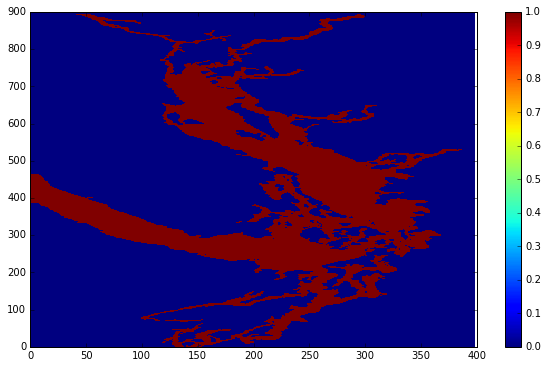

In [3]:
fig = plt.figure(figsize=(10,6))
axs=plt.gca()
mesh0=axs.pcolormesh(mesh[0,0,:,:])
cb0=fig.colorbar(mesh0,ax=axs)

In [4]:
print(mesh.shape)
print(np.sum(mesh[0,0,-1,:]))
print(np.sum(mesh[0,0,-2,:]))
print(mesh[0,0,-2,35:55])# choose 52 for 

(1, 40, 898, 398)
0
13
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]


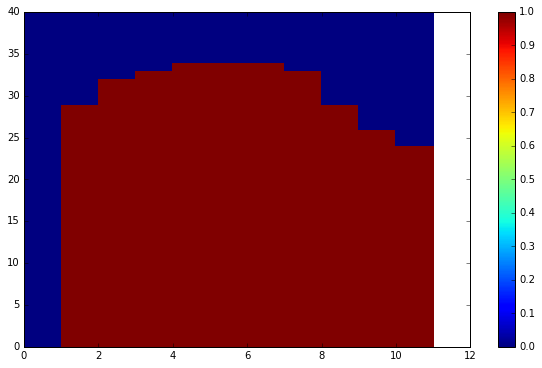

In [5]:
fig = plt.figure(figsize=(10,6))
axs=plt.gca()
mesh0=axs.pcolormesh(mesh[0,:,-13:-2,52])
cb0=fig.colorbar(mesh0,ax=axs)

In [6]:
print(fm.variables['tmask'][0,0,550,210])
print(mesh[0,0,550,210])
print(fm.variables['tmask'][0,0,0,0])
print(mesh[0,0,0,0])
print(f.variables['vosaline'].shape)
print(f.variables['vosaline'].shape)
#print(np.sum(f.variables['vosaline'][10,:,550,160:270]))

1
1
0
0
(2, 40, 898, 398)
(2, 40, 898, 398)


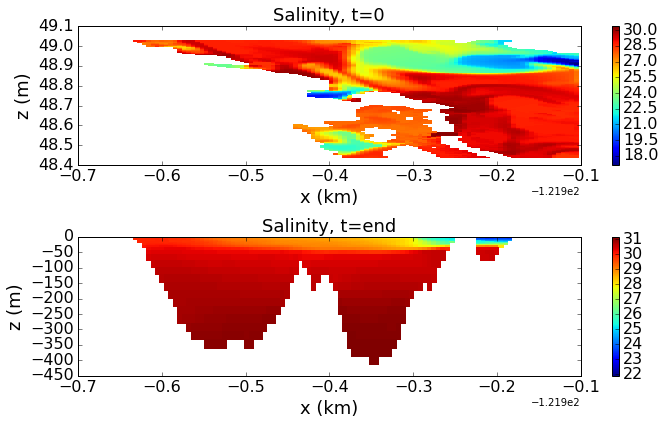

In [7]:
fig, axs = plt.subplots(2,1,figsize=(10,6))
mesh0=axs[0].pcolormesh(x0[400:550,160:270],y0[400:550,160:270],
                        np.ma.masked_where(mesh[0,0,400:550,160:270]==0,f.variables['vosaline'][-1,0,400:550,160:270]))
cb0=fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)', fontsize=18)
axs[0].set_xlabel('x (km)', fontsize=18)
axs[0].set_title('Salinity, t=0', fontsize=18)
#axs[0].autoscale(tight='True')
#axs[0].axis([0, 550, -400, 0])
plt.setp(axs[0].get_xticklabels(),fontsize=16)
plt.setp(axs[0].get_yticklabels(),fontsize=16)
cb0.ax.tick_params(labelsize=16)

mesh1=axs[1].pcolormesh(xx[:,160:270],zz[:,160:270],
                        np.ma.masked_where(mesh[0,:,550,160:270]==0,f.variables['vosaline'][0,:,550,160:270]))
cb1=fig.colorbar(mesh1,ax=axs[1])
axs[1].set_ylabel('z (m)', fontsize=18)
axs[1].set_xlabel('x (km)', fontsize=18)
axs[1].set_title('Salinity, t=end', fontsize=18)
#axs[1].autoscale(tight='True')
#axs[1].axis([0, 550, -400, 0])
plt.setp(axs[1].get_xticklabels(),fontsize=16)
plt.setp(axs[1].get_yticklabels(),fontsize=16)
cb1.ax.tick_params(labelsize=16)
plt.tight_layout()

In [8]:
print(fb.variables['NO3'][-1,0,300,160:270])
print(fb.variables['NO3'][-1,35,300,160:270])

[  0.           0.           0.           0.           0.           0.           0.
   0.          18.07209396  18.16202545  18.32778931  18.44135666
  18.55342865  19.58011818  19.46985054  19.87704277  19.80802727
  19.68067932  19.63947296  20.53002167  20.33387947  20.87922096
  20.33237839  20.41912079  20.41381073  20.75487137  21.01923943
  21.31151581  21.45674515  21.46796417  21.31228065  21.08087349
  20.68109703  20.21477318  20.08769417   0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.          17.15444946
  13.33633614  13.51299191  15.05686855  18.37491226  20.68852234
  20.97087097  20.81895638  20.70192146  20.28372955  19.87554169
  19.56239319  19.47566605  19.5752697   19.81251144  20.21784973
  20.56739998  20.72909546  20.68651199  20.66953278  20.56937408
  20

In [9]:
jj=400

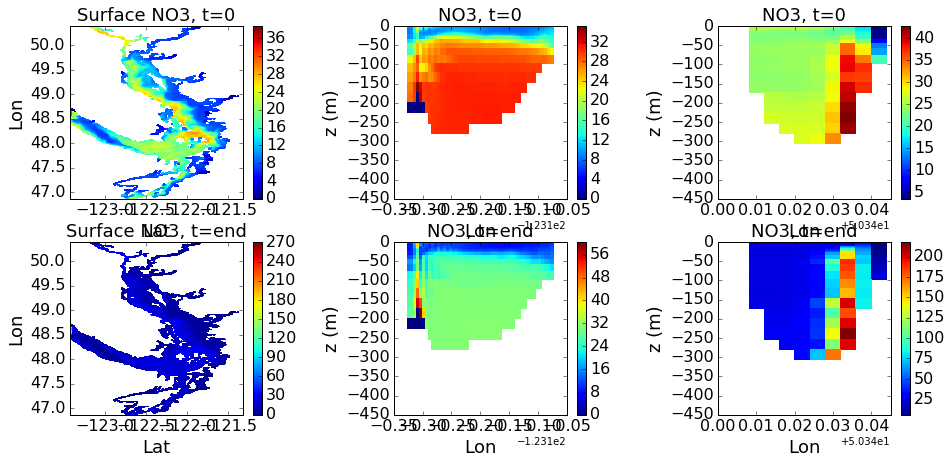

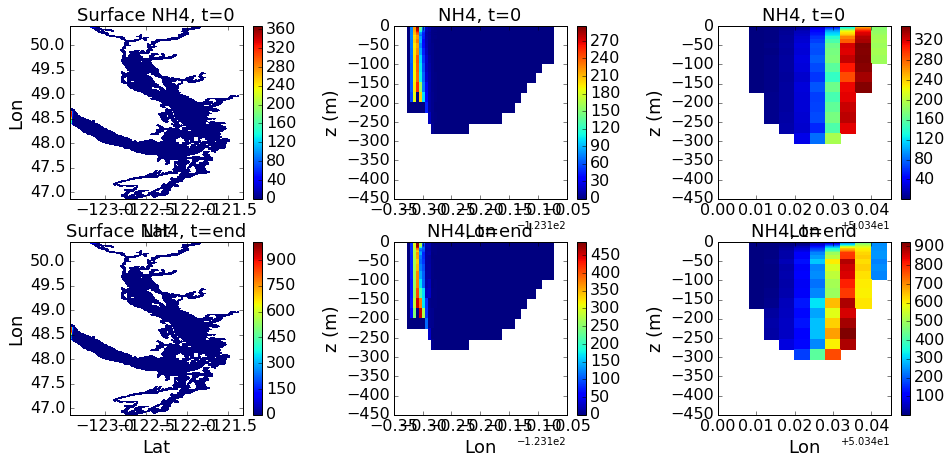

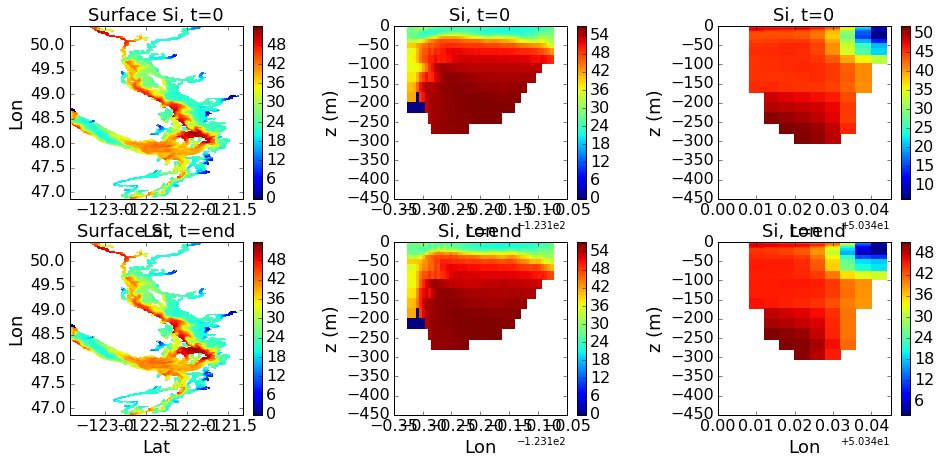

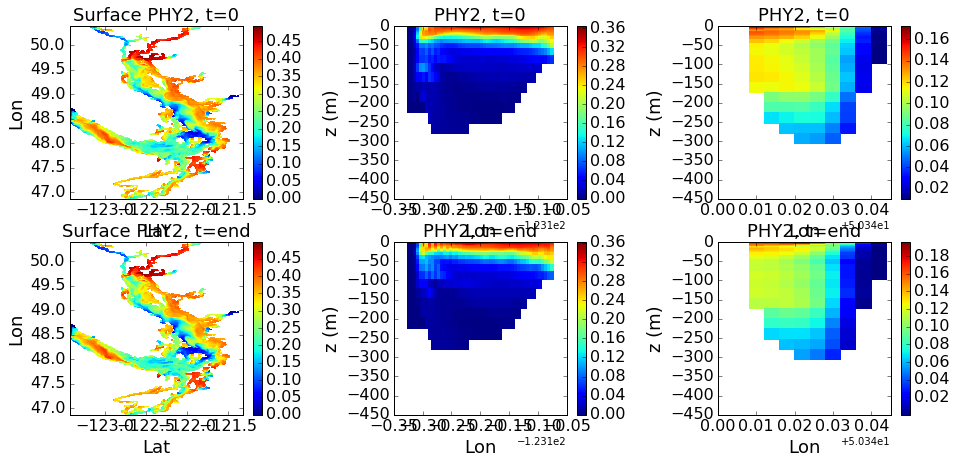

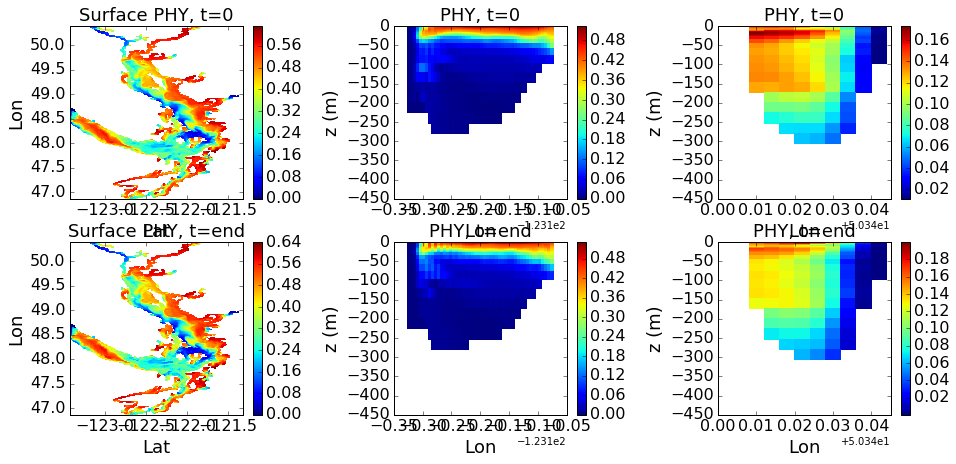

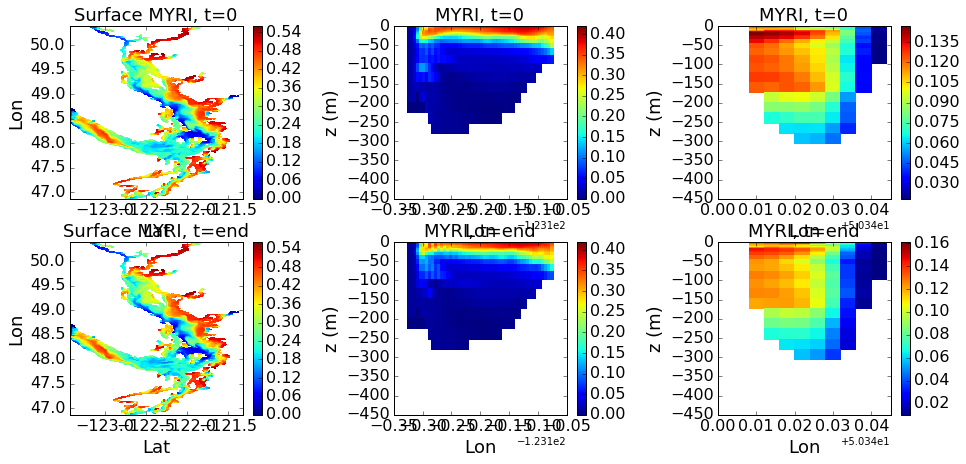

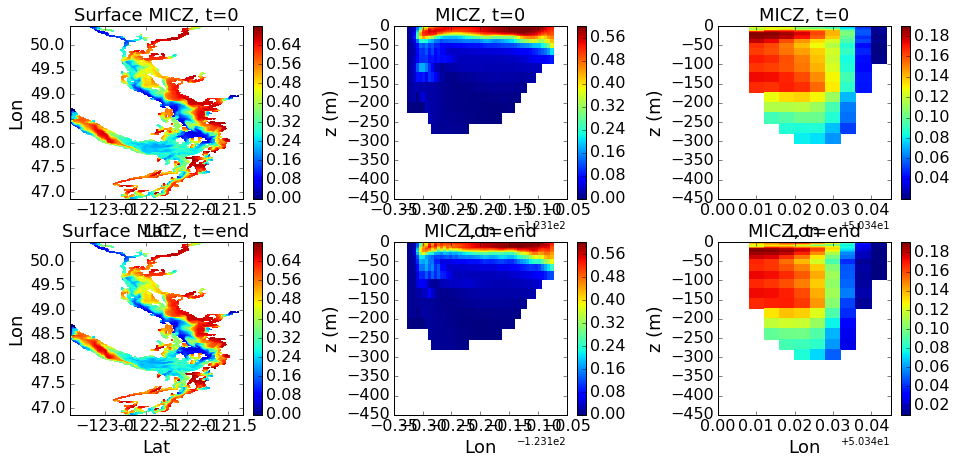

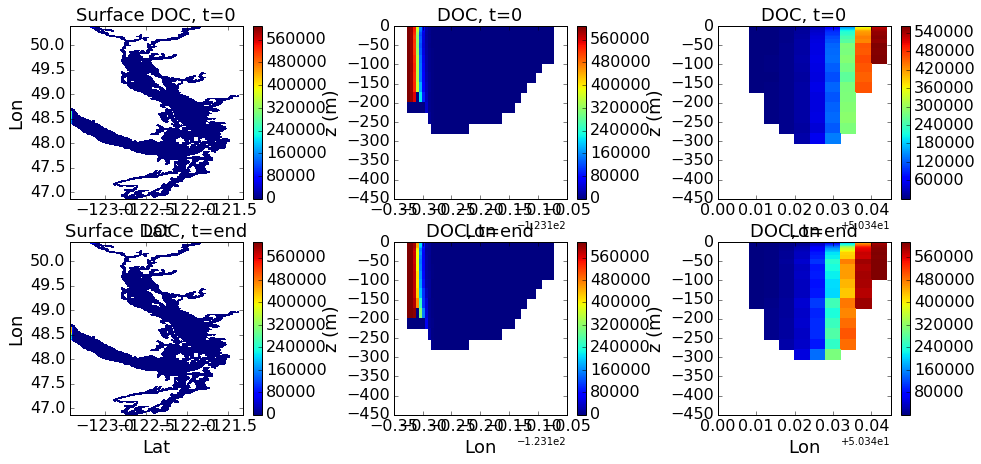

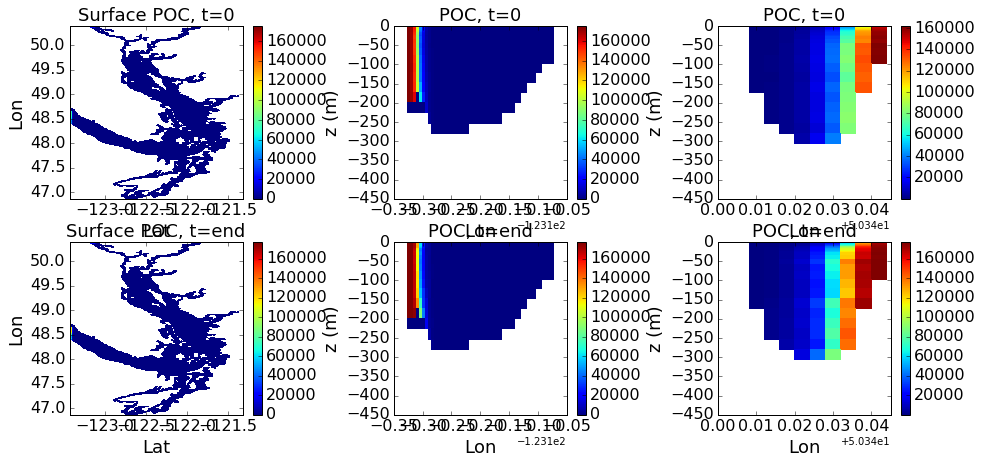

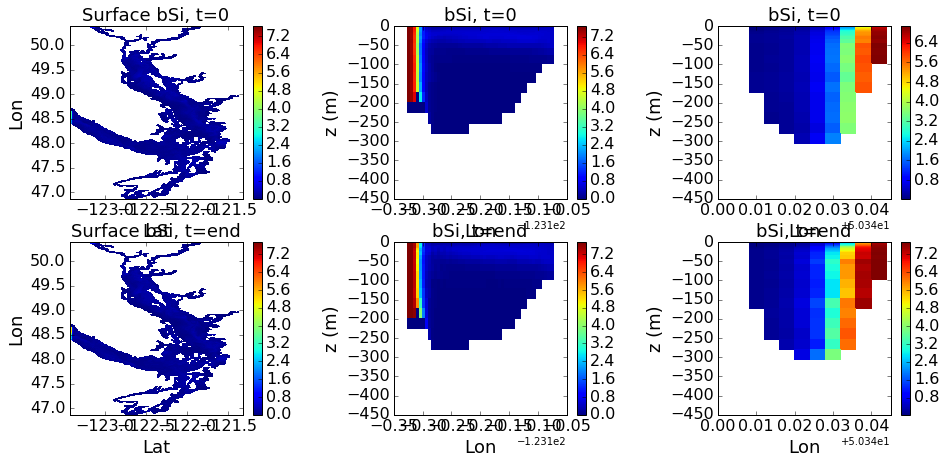

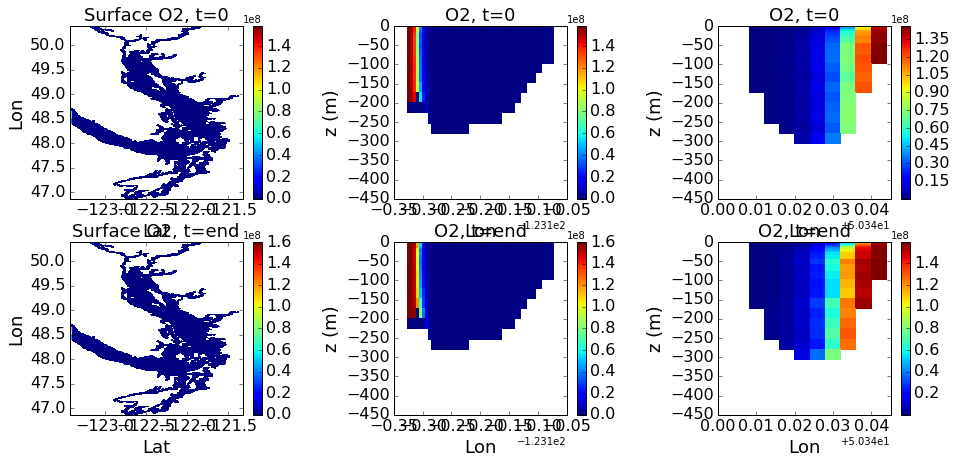

In [10]:
for ik in fkeys:
    if np.size(fb.variables[ik].shape) == 4:
        fig = plt.figure(figsize=(15,6))
        axs=fig.add_axes([0, .1, .2, .4])
        mesh0=axs.pcolormesh(x0,y0,
                    np.ma.masked_where(mesh[0,0,:,:]==0,fb.variables[ik][-1,0,:,:]))#,
         #                    vmin=np.min(fb.variables[ik]),vmax=np.max(fb.variables[ik]))
        cb0=fig.colorbar(mesh0,ax=axs)
        axs.set_ylabel('Lon', fontsize=18)
        axs.set_xlabel('Lat', fontsize=18)
        axs.set_title('Surface ' + ik + ', t=end', fontsize=18)
        #axs.autoscale(tight='True')
        axs.axis([lons[0], lons[-1], lats[0], lats[-1]])
        plt.setp(axs.get_xticklabels(),fontsize=16)
        plt.setp(axs.get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)
        #axs.axis([-122.3, -122.0, 48, 48.3])
        
        axs1=fig.add_axes([.3, .1, .2, .4])
        mesh1=axs1.pcolormesh(xx[:,0:50],zz[:,0:50],
                    np.ma.masked_where(mesh[0,:,jj,0:50]==0,fb.variables[ik][-1,:,jj,0:50]))#,
        #                      vmin=np.min(fb.variables[ik]),vmax=np.max(fb.variables[ik]))
        #                      np.ma.masked_where(mesh[0,:,550,160:270]==0,fb.variables[ik][-16,:,550,160:270]))
        cb1=fig.colorbar(mesh1,ax=axs1)
        axs1.set_ylabel('z (m)', fontsize=18)
        axs1.set_xlabel('Lon', fontsize=18)
        axs1.set_title(ik + ', t=end', fontsize=18)
        #axs[1].autoscale(tight='True')
        #axs1.axis([lons[168],lons[255],-z[-1],-z[0]])
        plt.setp(axs1.get_xticklabels(),fontsize=16)
        plt.setp(axs1.get_yticklabels(),fontsize=16)
        cb1.ax.tick_params(labelsize=16)
        
        axs2=fig.add_axes([.6, .1, .2, .4])
        mesh2=axs2.pcolormesh(yy[:,-13:-2],zy[:,-13:-2],
                    np.ma.masked_where(mesh[0,:,-13:-2,52]==0,fb.variables[ik][-1,:,-13:-2,52]))#,
         #                     vmin=np.min(fb.variables[ik]),vmax=np.max(fb.variables[ik]))
        #                      np.ma.masked_where(mesh[0,:,550,160:270]==0,fb.variables[ik][-16,:,550,160:270]))
        cb2=fig.colorbar(mesh2,ax=axs2)
        axs2.set_ylabel('z (m)', fontsize=18)
        axs2.set_xlabel('Lon', fontsize=18)
        axs2.set_title(ik + ', t=end', fontsize=18)
        #axs[1].autoscale(tight='True')
        #axs1.axis([lons[168],lons[255],-z[-1],-z[0]])
        plt.setp(axs2.get_xticklabels(),fontsize=16)
        plt.setp(axs2.get_yticklabels(),fontsize=16)
        cb2.ax.tick_params(labelsize=16)

        
        axs3=fig.add_axes([0, .6, .2, .4])
        mesh3=axs3.pcolormesh(x0,y0,
                    np.ma.masked_where(mesh[0,0,:,:]==0,fb.variables[ik][0,0,:,:]))#,
        #                      vmin=np.min(fb.variables[ik]),vmax=np.max(fb.variables[ik]))
        cb3=fig.colorbar(mesh3,ax=axs3)
        axs3.set_ylabel('Lon', fontsize=18)
        axs3.set_xlabel('Lat', fontsize=18)
        axs3.set_title('Surface ' + ik + ', t=0', fontsize=18)
        #axs.autoscale(tight='True')
        axs3.axis([lons[0], lons[-1], lats[0], lats[-1]])
        plt.setp(axs3.get_xticklabels(),fontsize=16)
        plt.setp(axs3.get_yticklabels(),fontsize=16)
        cb3.ax.tick_params(labelsize=16)
        #axs.axis([-122.3, -122.0, 48, 48.3])
        
        axs4=fig.add_axes([.3, .6, .2, .4])
        mesh4=axs4.pcolormesh(xx[:,0:50],zz[:,0:50],
                    np.ma.masked_where(mesh[0,:,jj,0:50]==0,fb.variables[ik][0,:,jj,0:50]))#,
         #                     vmin=np.min(fb.variables[ik]),vmax=np.max(fb.variables[ik]))
        #                      np.ma.masked_where(mesh[0,:,550,160:270]==0,fb.variables[ik][-16,:,550,160:270]))
        cb4=fig.colorbar(mesh4,ax=axs4)
        axs4.set_ylabel('z (m)', fontsize=18)
        axs4.set_xlabel('Lon', fontsize=18)
        axs4.set_title(ik + ', t=0', fontsize=18)
        #axs[1].autoscale(tight='True')
        #axs1.axis([lons[168],lons[255],-z[-1],-z[0]])
        plt.setp(axs4.get_xticklabels(),fontsize=16)
        plt.setp(axs4.get_yticklabels(),fontsize=16)
        cb4.ax.tick_params(labelsize=16)
        
        axs5=fig.add_axes([.6, .6, .2, .4])
        mesh5=axs5.pcolormesh(yy[:,-13:-2],zy[:,-13:-2],
                    np.ma.masked_where(mesh[0,:,-13:-2,52]==0,fb.variables[ik][0,:,-13:-2,52]))#,
        #                      vmin=np.min(fb.variables[ik]),vmax=np.max(fb.variables[ik]))
        #                      np.ma.masked_where(mesh[0,:,550,160:270]==0,fb.variables[ik][-16,:,550,160:270]))
        cb5=fig.colorbar(mesh5,ax=axs5)
        axs5.set_ylabel('z (m)', fontsize=18)
        axs5.set_xlabel('Lon', fontsize=18)
        axs5.set_title(ik + ', t=0', fontsize=18)
        #axs[1].autoscale(tight='True')
        #axs1.axis([lons[168],lons[255],-z[-1],-z[0]])
        plt.setp(axs5.get_xticklabels(),fontsize=16)
        plt.setp(axs5.get_yticklabels(),fontsize=16)
        cb5.ax.tick_params(labelsize=16)

In [11]:
np.max(np.isnan(np.ma.masked_where(mesh[0,:,:,:]==0,fb.variables['NH4'][-1,:,:,:])))

False

In [12]:
print(fb.variables['NO3'])

<class 'netCDF4._netCDF4.Variable'>
float32 NO3(time_counter, deptht, y, x)
    long_name: Nitrate Concentration
    units: mmol/m3
    online_operation: average
    interval_operation: 40 s
    interval_write: 1 h
    cell_methods: time: mean (interval: 40 s)
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered deptht nav_lon nav_lat
unlimited dimensions: time_counter
current shape = (2, 40, 898, 398)
filling on


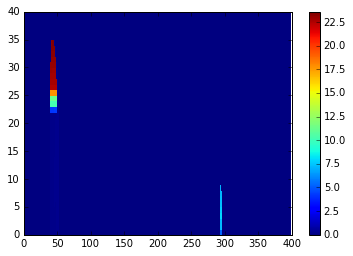

In [13]:
mesh=plt.pcolormesh(fb.variables['NO3'][0,:,-2,:])
cb=plt.colorbar(mesh)

In [14]:
print(fb.variables['Si'][-1,10,390:410,1])

[ 26.20215225  26.20215225  26.43112946  26.6600914   26.88922119
  27.11806488  27.34704971  27.49802399  27.5502758   27.60253334
  27.65475655  27.72520256  27.88229179  28.00329971  28.00638962
  28.00225449  27.99788857  27.99367905  27.98255348  27.95030022]


TypeError: 'QuadMesh' object is not subscriptable

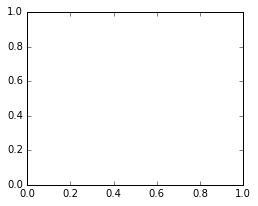

In [15]:
ik='NO3'
vmin=20
vmax=32
fig = plt.figure(figsize=(15,6))
axs=fig.add_axes([0, .1, .2, .4])
mesh0=axs.pcolormesh(x0,y0,
            np.ma.masked_where(mesh[0,0,:,:]==0,fb.variables[ik][-1,0,:,:]),
                     vmin=vmin,vmax=vmax)
cb0=fig.colorbar(mesh0,ax=axs)
axs.set_ylabel('Lon', fontsize=18)
axs.set_xlabel('Lat', fontsize=18)
axs.set_title('Surface ' + ik + ', t=end', fontsize=18)
#axs.autoscale(tight='True')
axs.axis([lons[0], lons[-1], lats[0], lats[-1]])
plt.setp(axs.get_xticklabels(),fontsize=16)
plt.setp(axs.get_yticklabels(),fontsize=16)
cb0.ax.tick_params(labelsize=16)
#axs.axis([-122.3, -122.0, 48, 48.3])

axs1=fig.add_axes([.3, .1, .2, .4])
mesh1=axs1.pcolormesh(xx[:,0:50],zz[:,0:50],
            np.ma.masked_where(mesh[0,:,jj,0:50]==0,fb.variables[ik][-1,:,jj,0:50]),
                      vmin=vmin,vmax=vmax)
#                      np.ma.masked_where(mesh[0,:,550,160:270]==0,fb.variables[ik][-16,:,550,160:270]))
cb1=fig.colorbar(mesh1,ax=axs1)
axs1.set_ylabel('z (m)', fontsize=18)
axs1.set_xlabel('Lon', fontsize=18)
axs1.set_title(ik + ', t=end', fontsize=18)
#axs[1].autoscale(tight='True')
#axs1.axis([lons[168],lons[255],-z[-1],-z[0]])
plt.setp(axs1.get_xticklabels(),fontsize=16)
plt.setp(axs1.get_yticklabels(),fontsize=16)
cb1.ax.tick_params(labelsize=16)

axs2=fig.add_axes([.6, .1, .2, .4])
mesh2=axs2.pcolormesh(yy[:,-13:-2],zy[:,-13:-2],
            np.ma.masked_where(mesh[0,:,-13:-2,52]==0,fb.variables[ik][-1,:,-13:-2,52]),
                      vmin=vmin,vmax=vmax)
#                      np.ma.masked_where(mesh[0,:,550,160:270]==0,fb.variables[ik][-16,:,550,160:270]))
cb2=fig.colorbar(mesh2,ax=axs2)
axs2.set_ylabel('z (m)', fontsize=18)
axs2.set_xlabel('Lon', fontsize=18)
axs2.set_title(ik + ', t=end', fontsize=18)
#axs[1].autoscale(tight='True')
#axs1.axis([lons[168],lons[255],-z[-1],-z[0]])
plt.setp(axs2.get_xticklabels(),fontsize=16)
plt.setp(axs2.get_yticklabels(),fontsize=16)
cb2.ax.tick_params(labelsize=16)


axs3=fig.add_axes([0, .6, .2, .4])
mesh3=axs3.pcolormesh(x0,y0,
            np.ma.masked_where(mesh[0,0,:,:]==0,fb.variables[ik][0,0,:,:]),
                      vmin=vmin,vmax=vmax)
cb3=fig.colorbar(mesh3,ax=axs3)
axs3.set_ylabel('Lon', fontsize=18)
axs3.set_xlabel('Lat', fontsize=18)
axs3.set_title('Surface ' + ik + ', t=0', fontsize=18)
#axs.autoscale(tight='True')
axs3.axis([lons[0], lons[-1], lats[0], lats[-1]])
plt.setp(axs3.get_xticklabels(),fontsize=16)
plt.setp(axs3.get_yticklabels(),fontsize=16)
cb3.ax.tick_params(labelsize=16)
#axs.axis([-122.3, -122.0, 48, 48.3])

axs4=fig.add_axes([.3, .6, .2, .4])
mesh4=axs4.pcolormesh(xx[:,0:50],zz[:,0:50],
            np.ma.masked_where(mesh[0,:,jj,0:50]==0,fb.variables[ik][0,:,jj,0:50]),
                      vmin=vmin,vmax=vmax)
#                      np.ma.masked_where(mesh[0,:,550,160:270]==0,fb.variables[ik][-16,:,550,160:270]))
cb4=fig.colorbar(mesh4,ax=axs4)
axs4.set_ylabel('z (m)', fontsize=18)
axs4.set_xlabel('Lon', fontsize=18)
axs4.set_title(ik + ', t=0', fontsize=18)
#axs[1].autoscale(tight='True')
#axs1.axis([lons[168],lons[255],-z[-1],-z[0]])
plt.setp(axs4.get_xticklabels(),fontsize=16)
plt.setp(axs4.get_yticklabels(),fontsize=16)
cb4.ax.tick_params(labelsize=16)

axs5=fig.add_axes([.6, .6, .2, .4])
mesh5=axs5.pcolormesh(yy[:,-13:-2],zy[:,-13:-2],
            np.ma.masked_where(mesh[0,:,-13:-2,52]==0,fb.variables[ik][0,:,-13:-2,52]),
                      vmin=vmin,vmax=vmax)
#                      np.ma.masked_where(mesh[0,:,550,160:270]==0,fb.variables[ik][-16,:,550,160:270]))
cb5=fig.colorbar(mesh5,ax=axs5)
axs5.set_ylabel('z (m)', fontsize=18)
axs5.set_xlabel('Lon', fontsize=18)
axs5.set_title(ik + ', t=0', fontsize=18)
#axs[1].autoscale(tight='True')
#axs1.axis([lons[168],lons[255],-z[-1],-z[0]])
plt.setp(axs5.get_xticklabels(),fontsize=16)
plt.setp(axs5.get_yticklabels(),fontsize=16)
cb5.ax.tick_params(labelsize=16)